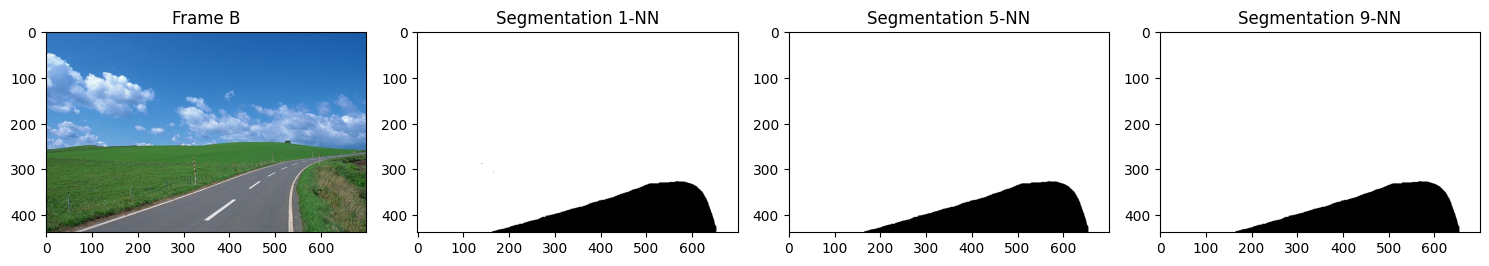

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

ground_truth = cv2.imread('frame_a_mask.png', cv2.IMREAD_GRAYSCALE)
frame_b = cv2.imread('frame_b.jpg')

X_train = np.argwhere(ground_truth > 0) 
y_train = np.ones(len(X_train))  

non_road_pixels = np.argwhere(ground_truth == 0)
X_train = np.vstack((X_train, non_road_pixels))
y_train = np.hstack((y_train, np.zeros(len(non_road_pixels)))) 

h, w, _ = frame_b.shape
X_test = np.array([[x, y] for x in range(h) for y in range(w)])

results = {}
for k in [1, 5, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    results[k] = predictions.reshape(h, w)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title('Frame B')
plt.imshow(cv2.cvtColor(frame_b, cv2.COLOR_BGR2RGB))

for i, k in enumerate(results.keys()):
    plt.subplot(1, 4, i + 2)
    plt.title(f'Segmentation {k}-NN')
    plt.imshow(results[k], cmap='gray')

plt.tight_layout()
plt.show()

ارزیابی K-NN برای تشخیص خط:

اثربخشی: K-NN می‌تواند برای تشخیص خطوط در سناریوهای کنترل‌شده، به‌ویژه در جایی که خط‌ها و خط‌ها دارای تفاوت‌های رنگی و بافتی متمایز در مقایسه با مناطق دیگر (مانند چمن، پیاده رو) هستند، مؤثر باشد.
محدودیت ها:
کارایی محاسباتی: K-NN می تواند محاسباتی فشرده باشد، به خصوص با مجموعه داده های بزرگتر، زیرا نیاز به محاسبه فاصله برای هر پیکسل در طول طبقه بندی دارد.
حساسیت به نویز: K-NN مستعد نویز و عوامل دورافتاده است که می تواند منجر به طبقه بندی نادرست مناطق جاده شود، به ویژه در روشنایی متغیر یا شرایط آب و هوایی.
انتخاب ویژگی: اثربخشی K-NN به شدت به ویژگی های مورد استفاده برای طبقه بندی متکی است. در تقسیم‌بندی تصویر، ویژگی‌های پیشرفته‌تر (مانند هیستوگرام‌های رنگی، ویژگی‌های بافت) ممکن است نتایج را بهبود بخشد.